# MULTI LINEAR REGRESSION 

Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years


In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



In [2]:
# loading data set
df=pd.read_csv('50_Startups.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
### EDA--
list(df)

['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit']

In [4]:
## cheching null values and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
# correlation 
df.corr()

C:\Users\Durga Prasad\AppData\Local\Temp\ipykernel_15352\1576546410.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [6]:
df.shape

(50, 5)

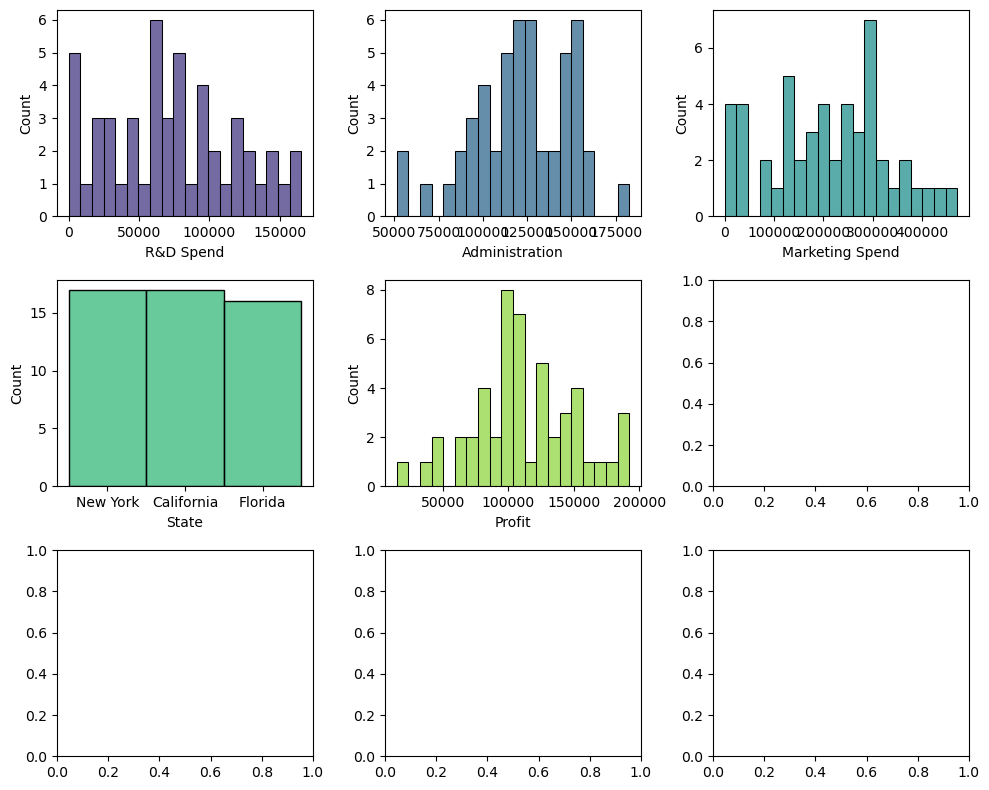

In [15]:
#---histogram---## 
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 8))  
h1 = ['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit']
colors = sns.color_palette('viridis', n_colors=len(h1))
for i, (variable, color) in enumerate(zip(h1, colors)):
    sns.histplot(data=df, x=variable, ax=axes[i // 3, i % 3], color=color, bins=20)
plt.tight_layout()
plt.show()


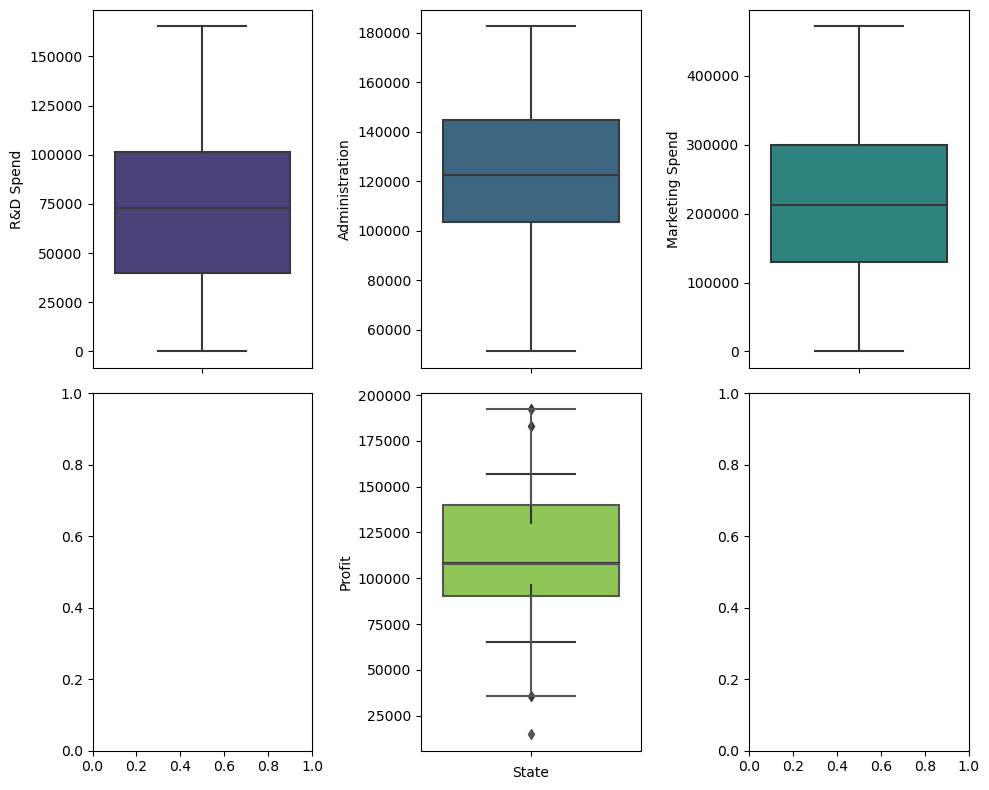

In [14]:
# box plot visuvalization
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 8))
b1 = ['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit']
colors = sns.color_palette('viridis', n_colors=len(b1))

for i, (variable, color) in enumerate(zip(b1, colors)):
    if variable != 'State':
        sns.boxplot(data=df, y=variable, ax=axes[i // 3, i % 3], color=color)
    else:
        sns.boxplot(data=df, x='State', y='Profit', ax=axes[i // 2, i % 2], palette='viridis')

plt.tight_layout()
plt.show()


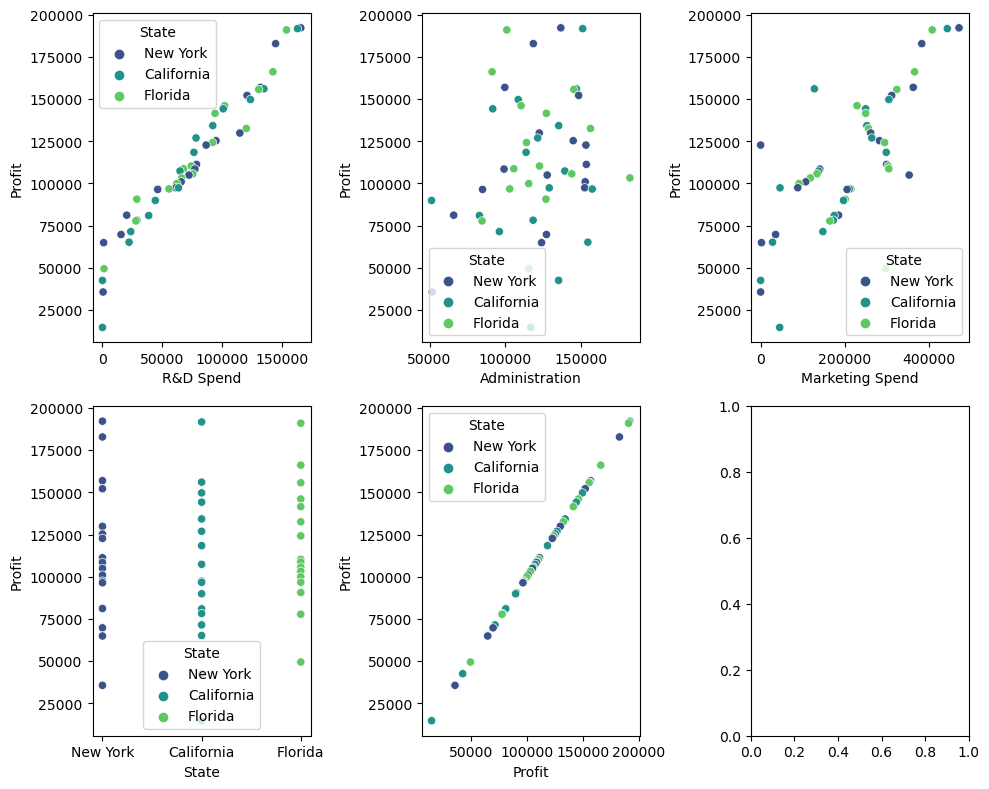

In [16]:
###--- Scatter-plot---###
s1 = ['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 8))
colors = sns.color_palette('viridis', n_colors=len(s1))
for i, variable in enumerate(s1):
    sns.scatterplot(data=df,x=variable,y='Profit',hue='State',ax=axes[i //3,i % 3], palette='viridis')
plt.tight_layout()
plt.show()


C:\Users\Durga Prasad\AppData\Local\Temp\ipykernel_15352\2609506830.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = subset_df.corr()


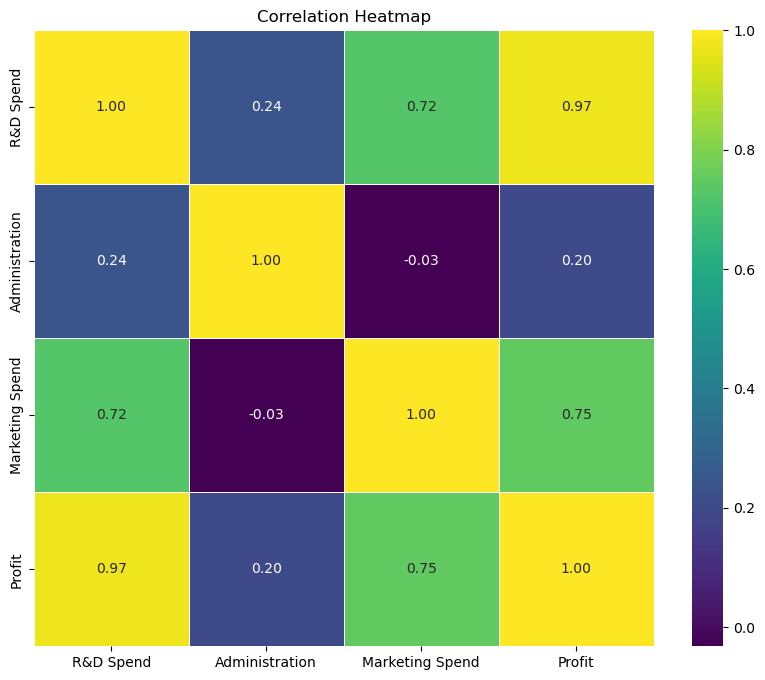

In [17]:
##-- heat map---##
h1 = ['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit']
subset_df = df[h1]
correlation_matrix = subset_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


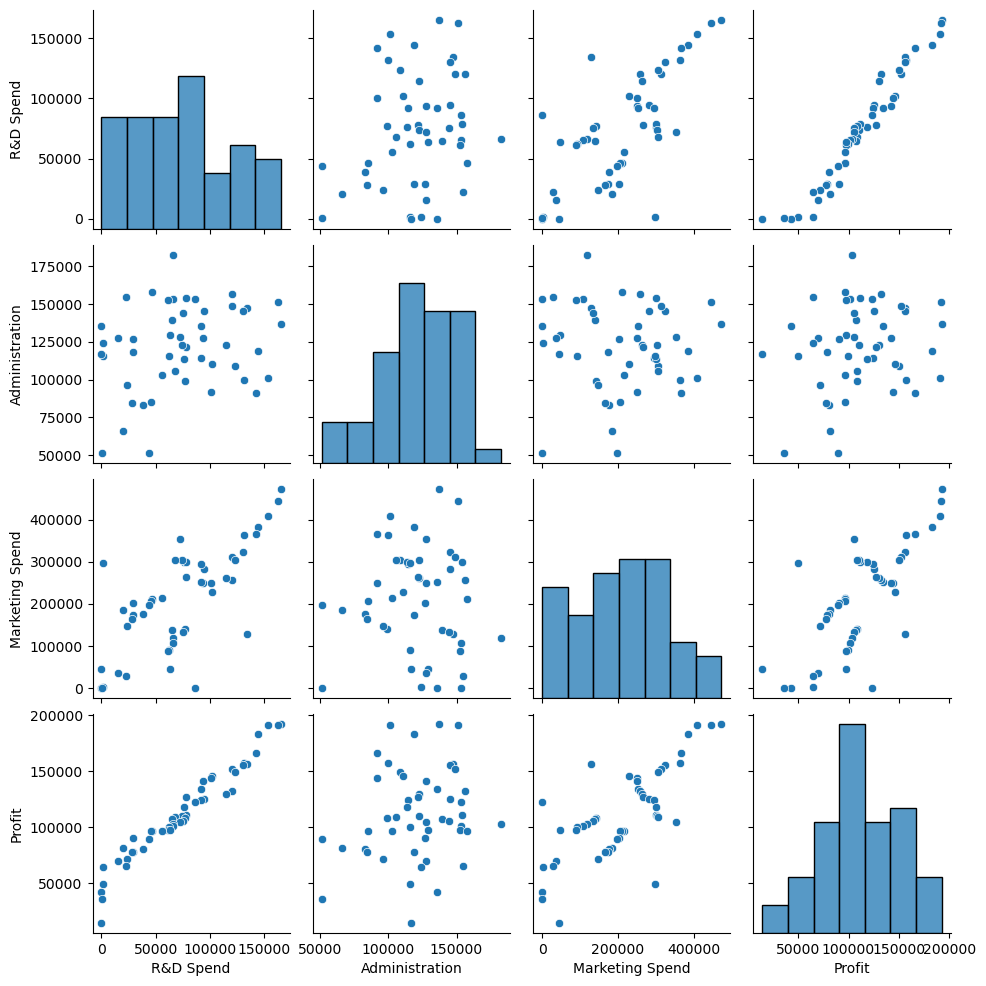

In [18]:
# Pair plot
sns.pairplot(df)
plt.show()


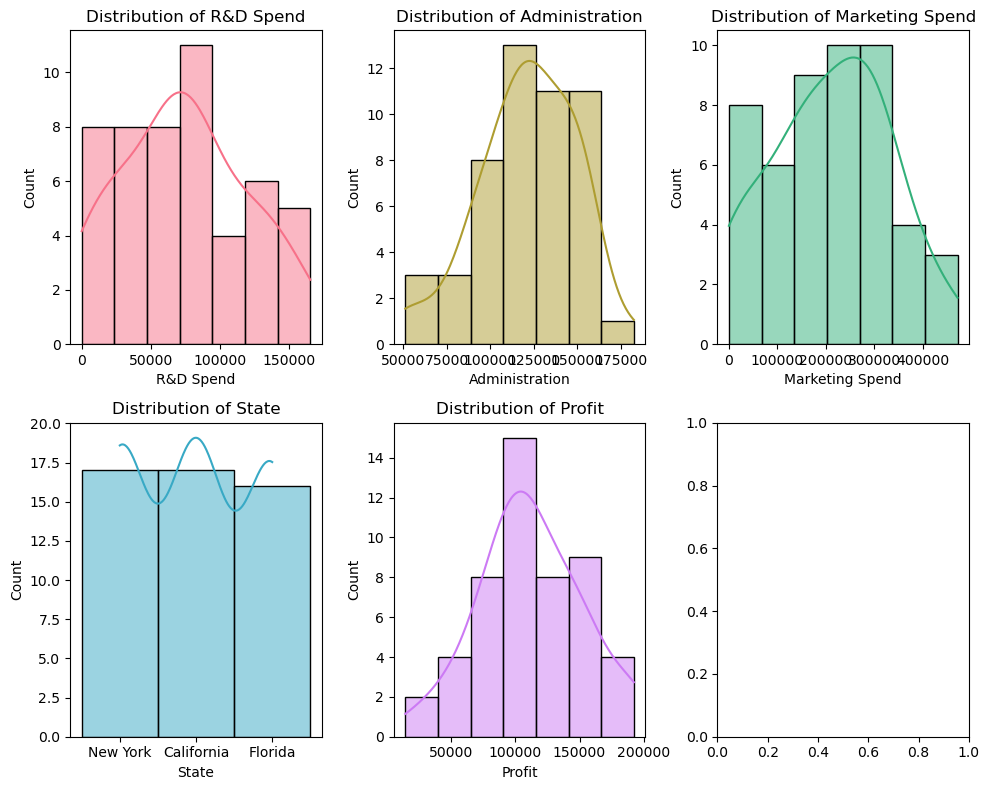

In [19]:
##--Distribution plot---##
dsplot = ['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit']
colors = sns.color_palette('husl', n_colors=len(dsplot))
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10,8))
axes = axes.flatten()
for i, (variable, color) in enumerate(zip(dsplot, colors)):
    sns.histplot(df[variable], kde=True, ax=axes[i], color=color)
    axes[i].set_title(f'Distribution of {variable}')
plt.tight_layout()
plt.show()


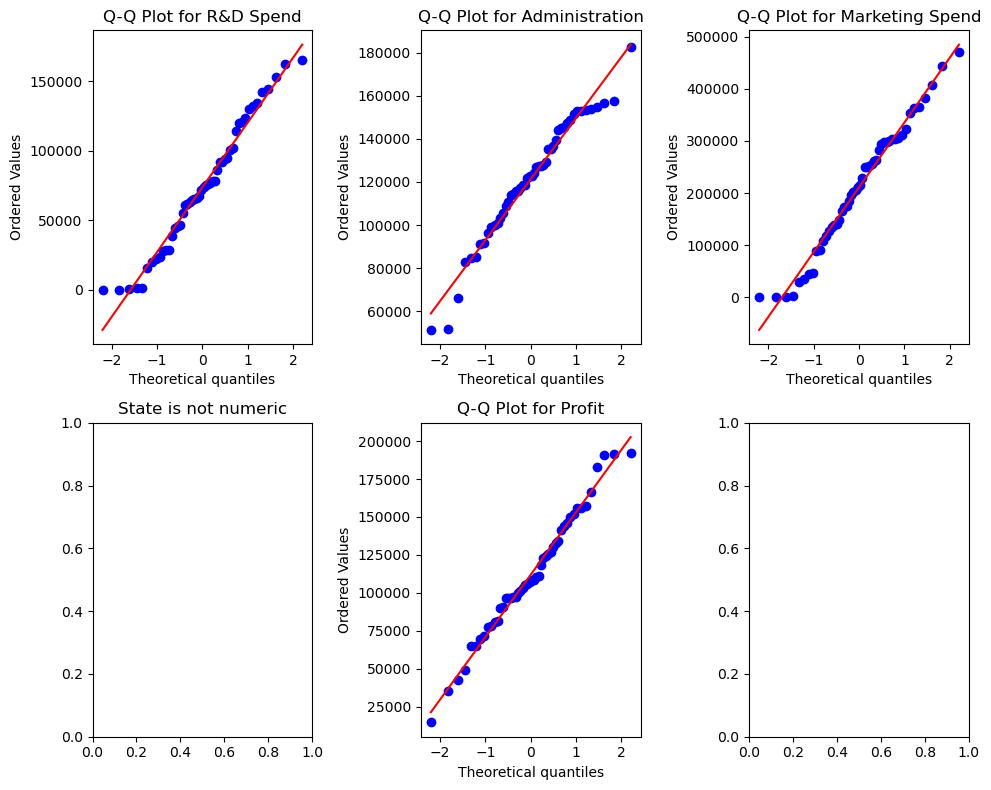

In [20]:
##--- Q-Q-plt----
qqplot = ['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 8))
axes = axes.flatten()
for i, column in enumerate(qqplot):
    if pd.api.types.is_numeric_dtype(df[column]):
        stats.probplot(df[column], dist="norm", plot=axes[i])
        axes[i].set_title(f'Q-Q Plot for {column}')
    else:
        axes[i].set_title(f'{column} is not numeric')
plt.tight_layout()
plt.show()


In [24]:
###---X & Y Variables---###
y = df['Profit']
x = df.drop('Profit', axis=1)


In [27]:
# Separate numerical and categorical columns
numerical_cols = x.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = x.select_dtypes(include=['object']).columns

numerical_transformer = StandardScaler()
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])
# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

x_new = preprocessor.fit_transform(x)
y_new = numerical_transformer.fit_transform(y.values.reshape(-1, 1)) 


In [28]:
## Standardization
ss = StandardScaler()
x_new = ss.fit_transform(x)
y_new = ss.fit_transform(y.values.reshape(-1, 1))  # Reshape y to be a 2D array


In [29]:
## train and test and data partion
training_error = []
test_error = []

for i in range(1, 101):
    x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.3,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    y_pred_train = LR.predict(x_train)
    y_pred_test = LR.predict(x_test)
    training_error.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))


In [30]:
### -- printing train test errors and R^2 scores
print('Average train error(Root mean squared) :',np.sqrt(mean_squared_error(y_train,y_pred_train)))
print('Average test error(Root mean squared) :',np.sqrt(mean_squared_error(y_test,y_pred_test)))
print('R^2 score:',r2_score(y_train,y_pred_train))


Average train error(Root mean squared) : 0.17421965559911895
Average test error(Root mean squared) : 0.3252615894130199
R^2 score: 0.9663986001072629


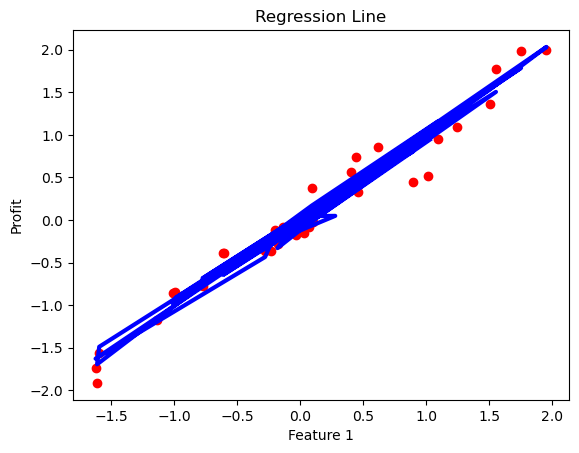

In [31]:
###---# Visualize the regression line
plt.scatter(x_train[:, 0], y_train, color='red')  
plt.plot(x_train[:, 0], y_pred_train, color='blue', linewidth=3)
plt.title('Regression Line')
plt.xlabel('Feature 1')  
plt.ylabel('Profit')
plt.show()
